# EXECUTIVE SUMMARY

1. Optimum Machine Model Chosen: XGBoost Classifier
2. Accuracy Score: 82.6%
3. Cross Validation Score: 76.95
4. Final Accuracy Score(After Hyperparamter Tunning): 83%
5. AUC Score: 86%
6. Key Operations executed: Exploratory Data Analysis(EDA), Data Preprocessing, Metrics Measurement, Model Execution and Hyperparameter Tunning

# PROJECT CONTENTS
- Problem Statement
- Domain Knowledge
- Step 1: Attributes of Variables
- Step 2: IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS
 - 2.1:Import all necessary libraries
 - 2.2:Load Dataset
 - 2.3:Data Descriptive Analysis
 - 2.4:Observations
- Step 3: EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
 - 3.1:Count Distribution of Categorical Data - Univariate Analysis
 - 3.2:Updating Null values
 - 3.3:Feature Selection
 - 3.4:Encoding
 - 3.5:Normal Distribution Check - Univariate Analysis
 - 3.6:Scatter Plot Check
 - 3.7:Correlation Check
 - 3.8:Outlier Check
 - 3.9:Skewness Check
 - 3.10:Target Variable Check
- Step 4: DATA PREPROCESSING
 - 4.1:Removal of Duplicates
 - 4.2:Rechecking the current Relationship btw Variables
 - 4.3:Dropping of Features that strongly promotes multicollinearity(VIF)
 - 4.4:Removal of Outliers
 - 4.5:Transforming Data to Remove Skewness using Power transformation
 - 4.6:Seperating the datasets into X and Y variables
 - 4.7:Imbalancing of Target Variable
- Step 5: MODEL BUILDING
 - 5.1:Logistic Regression
 - 5.2:KNeighbors Classifier
 - 5.3:RandomForest Classifier
 - 5.4:AdaBoost Classifier
 - 5.5:GradientBoosting Classifier
 - 5.6:XGBoost Classifier
 - 5.7:ExtraTrees Classifier
 - 5.8:Support Vector Classifier(SVC)
- Step 6:COMPARING ALL MACHINE LEARNING MODELS
 - 6.1:Comparing Differences between Accuracy and Cross_Validation Scores...
 - 6.2:Conclusion on Choice of Model
- Step 7:HYPERPARAMETER TUNNING
- Step 8:ROC AUC PLOT
- Step 9:MODEL SAVING

# PROBLEM STATEMENT(Titanic Project)

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Note: You can find the dataset in the link below.
Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

# Domain Knowledge
This is a critical stage in any machine learning process. It involves brainstorming and coming up with as many hypothesis as possible about what could affect the target variable. It facilitates in exploring the data at hand more efficiently and effectively. Domain Knowledge should be done before seeing the data or else we will end up with biased hypotheses. 

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Below are some anticipated assertions on the problem statement;

- Passengers got their ID irrespective of Age or Class
- Passengers Class could contribute to assignment of lifeboats
- Sex has a strong contribution in survival as women and children were given priority when distributing lifeboats.
- Names of Passengers does not contribute to who survives or not as 

# Step 1 - ATTRIBUTES OF VARIABLES

1. PassengerId - This is the unique ID assigned to each passenger
2. Pclass - refers to passenger class (1st, 2nd, 3rd), and is a proxy for socio-economic class
3. Name - Name of Passengers on board
4. Sex - This refers to the sexual orientation of each passenger. i.e Male or Female 
5. Age - This represent the length of time each passenger has lived or has existed
6. SibSp - This represent Number of Siblings/Spouses onboard 
7. Parch -  This means Number of Parents/Children onboard 
8. Ticket - a piece of paper or small card that gives passengers a certain right to board the ship.
9. Fare - The amount of money each passenger paid for the trip.
10. Cabin - This refere ot a private room or compartment in the ship           
11. Embarked - Implies where the passengers mounted from. There are three possible values— Southampton(S), Cherbourg(C), and                    Queenstown(Q) 
12. Survived - This refers to the survivors whereby 1 means survived and 0 did not survive 

# Step 2 - IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS

# Step 2.1 - Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve
from scipy.stats import zscore
from sklearn.preprocessing import power_transform, PowerTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings('ignore')

# Step 2.2 - Load Dataset

In [2]:
#Load dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#checking the first five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking the last five rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#picking 4 random samples
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S


# Step 2.3 - Data Descriptive Analysis

In [6]:
#checking the data shape
df.shape

(891, 12)

In [7]:
#checking for nature of datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#Checking data full description
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#lets check the columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
#Checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#Checking for null values
df.isnull().sum().sum()

866

In [13]:
#Checking the content of each Categorical columns
print("The Value Counts in Pclass - ",Counter(df['Pclass']))
print("The Value Counts in Sex - ",Counter(df['Sex']))
print("The Value Counts in SibSp - ",Counter(df['SibSp']))
print("The Value Counts in Cabin - ",Counter(df['Cabin']))
print("The Value Counts in Embarked - ",Counter(df['Embarked']))

The Value Counts in Pclass -  Counter({3: 491, 1: 216, 2: 184})
The Value Counts in Sex -  Counter({'male': 577, 'female': 314})
The Value Counts in SibSp -  Counter({0: 608, 1: 209, 2: 28, 4: 18, 3: 16, 8: 7, 5: 5})
The Value Counts in Cabin -  Counter({nan: 687, 'G6': 4, 'C23 C25 C27': 4, 'B96 B98': 4, 'F33': 3, 'E101': 3, 'F2': 3, 'D': 3, 'C22 C26': 3, 'C123': 2, 'D33': 2, 'C52': 2, 'B28': 2, 'C83': 2, 'F G73': 2, 'D26': 2, 'B58 B60': 2, 'C2': 2, 'E33': 2, 'F4': 2, 'D36': 2, 'C93': 2, 'C78': 2, 'D35': 2, 'B77': 2, 'E67': 2, 'C125': 2, 'B49': 2, 'C65': 2, 'B57 B59 B63 B66': 2, 'B18': 2, 'C124': 2, 'B35': 2, 'E44': 2, 'C92': 2, 'D20': 2, 'E25': 2, 'B22': 2, 'C68': 2, 'C126': 2, 'B51 B53 B55': 2, 'B5': 2, 'B20': 2, 'E24': 2, 'E8': 2, 'E121': 2, 'D17': 2, 'C85': 1, 'E46': 1, 'C103': 1, 'D56': 1, 'A6': 1, 'B78': 1, 'B30': 1, 'E31': 1, 'A5': 1, 'D10 D12': 1, 'C110': 1, 'F E69': 1, 'D47': 1, 'B86': 1, 'B19': 1, 'A7': 1, 'C49': 1, 'A32': 1, 'B4': 1, 'B80': 1, 'A31': 1, 'D15': 1, 'C87': 1, '

In [14]:
#Checking the goemetry of the Target column
from collections import Counter
print("The Value Counts in Survived - ",Counter(df['Survived']))

The Value Counts in Survived -  Counter({0: 549, 1: 342})


In [15]:
#Checking the count
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
#Checking the content of each categorical column
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
#Checking the content of each categorical column
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
#Checking the content of each categorical column
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [19]:
#Checking the content of each categorical column
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Step 2.4 - Observations


# The Dataset is made up of;
-  891 rows and 12 columns
- 11 features and 1 Target

# Description of Features:
1. PassengerId: 
- It is made up of Continuos  data 
- It has no null values
- Its Datatype is an interger type

2. Pclass:
- It is made up of Categorical data
- it has 3 factors; Class 1, Class 2, Class 3
- It has no null values
- Its Datatype is an interger type

3. Name: 
- It is made up of Categorical(Non-numerical) data
- It has no null values
- Its Datatype is an Object type

4. Sex:
- It is made up of Categorical data
- it has 2 factors; Male, Female
- It has no null values
- Its Datatype is an Object type

5. Age: 
- It is made up of Continuos data
- It has 177 null values
- Its Datatype is a Float type

6. SibSp:
- It is made up of Continuos data
- It has no null values
- Its Datatype is an interger type

7. Parch: 
- It is made up of Continuos data
- It has no null values
- Its Datatype is an interger type

8. Ticket:
- It is made up of Non-numerical data
- It has no null values
- Its Datatype is an Object type

9. Fare: 
- It is made up of Continuos data
- It has null values
- Its Datatype is a Floating type

10. Cabin: 
- It is made up of Categorical data
- It has 687 null values
- Its Datatype is an Object type

11. Embarked: 
- It is made up of Categorical data
- It has 3 factors - Southampton(S), Cherbourg(C), and Queenstown(Q)  
- It has 2 null values 
- It Datatype is an Object type


# About the Target/Label:
12. Survived: This is the target variable and has the following properties:
- It has no null values
- Its Datatype is interger type
- It is made up of Categorical data


**Since the target is made up of a categorical data hence this is a CLASSIFICATION PROBLEM!

# Step 3 - EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

# Step 3.1 Count Distribution of Categorical Data - Univariate Analysis

In [21]:
#Lets cull-out the categorical data in a seperate object
features = df.drop(columns=['PassengerId','Name','Age','Ticket','Fare'])
features

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,0,3,male,1,0,NaN,S
1,1,1,female,1,0,C85,C
2,1,3,female,0,0,NaN,S
3,1,1,female,1,0,C123,S
4,0,3,male,0,0,NaN,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,NaN,S
887,1,1,female,0,0,B42,S
888,0,3,female,1,2,NaN,S
889,1,1,male,0,0,C148,C


0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


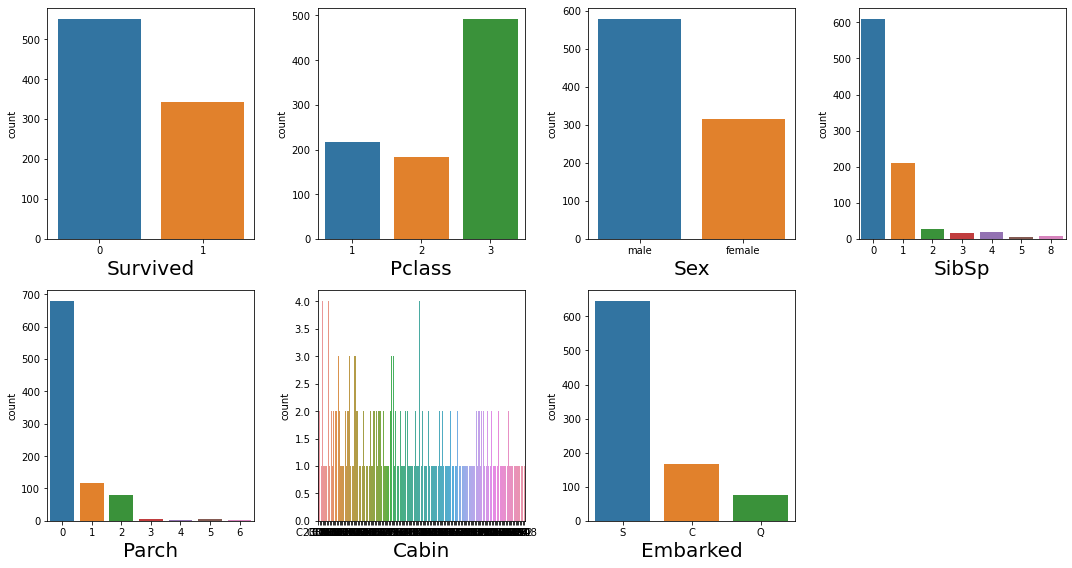

In [22]:
#Check for count distribution and see how data is distributed for every column
plt.figure(figsize=(15,8))#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’
for column in features:#triggering your for loop
    if plotnumber<=8:#since there are 6 features
        ax = plt.subplot(2,4,plotnumber)#3,4 means arrange the graphs in 2-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.countplot(features[column])#performing a distribution plot for all the columns starting with
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 8
    print(features[column].value_counts())
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations Univariate Analysis on Categorical Data 
From the above count plots 
- Those that survived was less than those didnt survive
- Majority of the passengers where 3rd Class
- Majority of of men were on board compared to women
- Majority of passengers did not board with their family members
- Majority of passengers embarked from Southampton

# Step 3.2 Updating Null values

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- We can see only 3 features possess null values; Age, Cabin and Embarked. So lets go ahead and fill them up! 
- but before then, we need to ensure the Age data is transformed into interger as we cant have floating values for age!

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


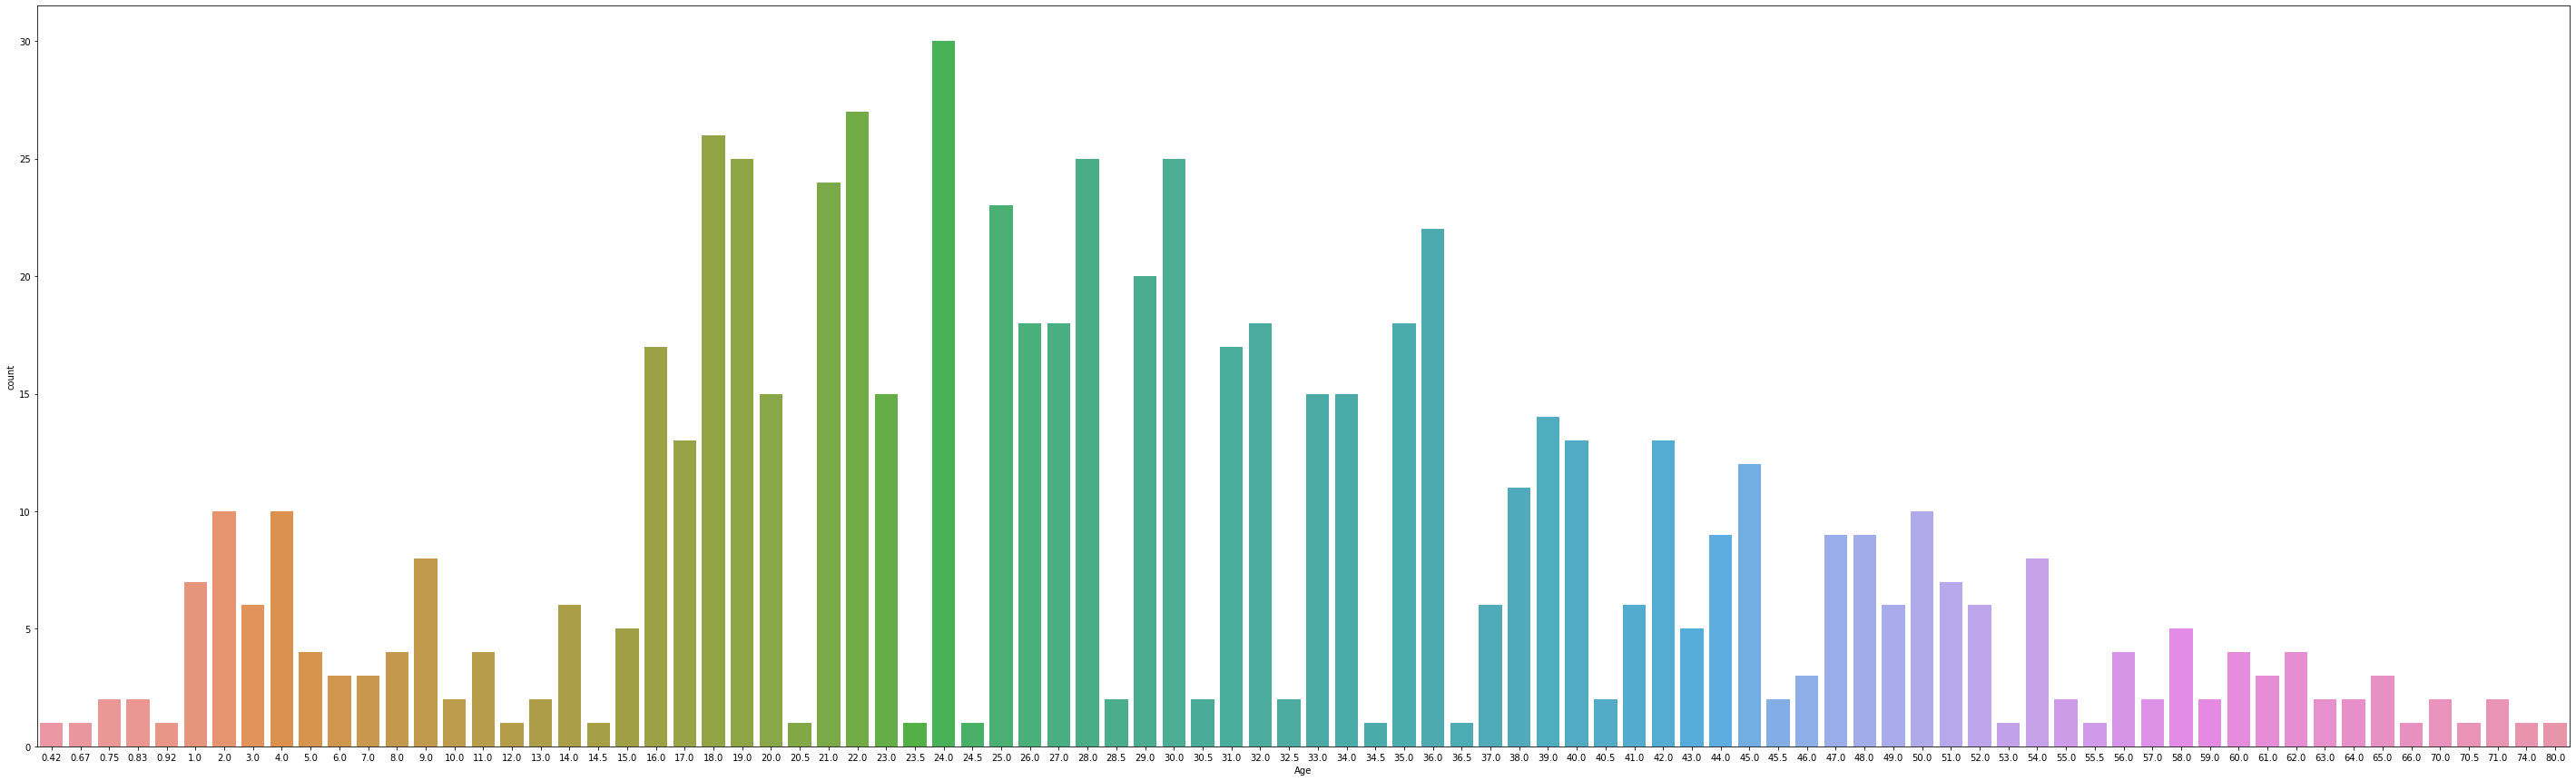

In [25]:
#lets see the age distribution...
plt.figure(figsize=(50,15))
ax=sns.countplot(x='Age',data=df)
print(df['Age'].value_counts())

- We will use fillna on Age(Mean), Cabin(Mode) and Embarked(Mode)
- Then we round up all the decimal vaules for Age to whole numbers

In [26]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

We can see all nulls have been removed

Now lets see the data types

In [28]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We can see Age is still showing float so lets convert it to interger using .astype!

In [29]:
df['Age']=df['Age'].astype(int)

In [30]:
df['Age'].dtype

dtype('int32')

In [31]:
df['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int32

# Observations on Null Update 
From the above we can see that;
- All null values have been updated! 
- Ages are now of interger data type!

# Step 3.3 - Feature Selection
From domain Knowledge some features like Name, Passenger ID, Ticket has no impact on the survivors so we will eventually drop them as needless to perform encoding process!

In [32]:
df.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22,1,0,7.2500,B96 B98,S
1,1,1,female,38,1,0,71.2833,C85,C
2,1,3,female,26,0,0,7.9250,B96 B98,S
3,1,1,female,35,1,0,53.1000,C123,S
4,0,3,male,35,0,0,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,B96 B98,S
887,1,1,female,19,0,0,30.0000,B42,S
888,0,3,female,29,1,2,23.4500,B96 B98,S
889,1,1,male,26,0,0,30.0000,C148,C


# Observations on Feature Selection 
From the above we can see that;
- Irrelevant columns have been dropped
- Data is looking more refined!

# Step 3.4 - Encoding
- We Shall use Label encoding on the remaining non numerical data; Sex, Cabin and Embarked

In [33]:
#initializing...
enc=LabelEncoder()

In [34]:
df['Sex'] = enc.fit_transform(df['Sex'])
df['Cabin'] = enc.fit_transform(df['Cabin'])
df['Embarked'] = enc.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22,1,0,7.2500,47,2
1,1,1,0,38,1,0,71.2833,81,0
2,1,3,0,26,0,0,7.9250,47,2
3,1,1,0,35,1,0,53.1000,55,2
4,0,3,1,35,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.0000,47,2
887,1,1,0,19,0,0,30.0000,30,2
888,0,3,0,29,1,2,23.4500,47,2
889,1,1,1,26,0,0,30.0000,60,0


# Observations on Feature Selection 
From the above we can see that;
- All non-numerical columns have been converted to numerical data! Lets move on!

# Step 3.5 - Normal Distribution Check

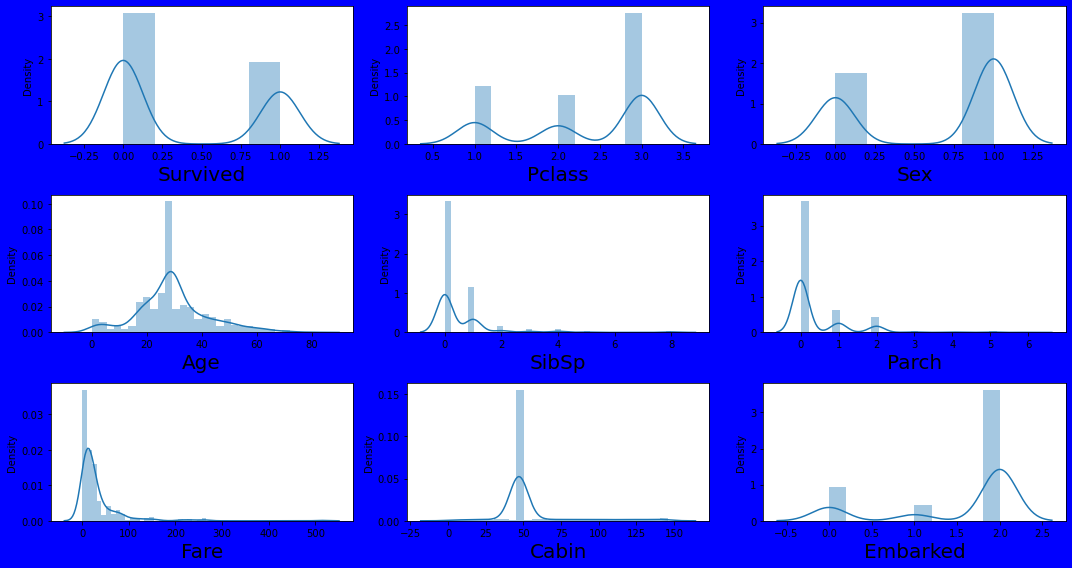

In [35]:
#Check for normal distribution and see how data is distributed for every column
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’
for column in df:#triggering your for loop
    if plotnumber<=9:#since there are 6 features
        ax = plt.subplot(3,3,plotnumber)#3,43means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form. 

In [36]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age           int32
SibSp         int64
Parch         int64
Fare        float64
Cabin         int32
Embarked      int32
dtype: object

# Observations on Normal Distribution Check
From the above density plot we can see that multiple features does not obey a normal distribution, the building blocks is not in tandem with a normalized curve:

- Pclass(has three peak points at the 1, 2 and 3 mark)
- Sex(has two peak points at the 0 and 1 mark)
- Age(has two peak points at the 2 and 22 mark)
- SibSp (has two peak points at the 0 and 1 mark)
- Parch(has three peak points at the 0, 1 and 32mark)
- Fare
- Cabin
- Embarked


***The normal distribution of the survived has no contribution to our Model Building

# Step 3.6 - Scatter Plot Check
- Lets visualize the relationship between the features and the Label

In [37]:
#extracting only the features(wihtout the Label) from the original dataset and store in features
Features=df.drop('Survived',axis=1)
Features

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22,1,0,7.2500,47,2
1,1,0,38,1,0,71.2833,81,0
2,3,0,26,0,0,7.9250,47,2
3,1,0,35,1,0,53.1000,55,2
4,3,1,35,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.0000,47,2
887,1,0,19,0,0,30.0000,30,2
888,3,0,29,1,2,23.4500,47,2
889,1,1,26,0,0,30.0000,60,0


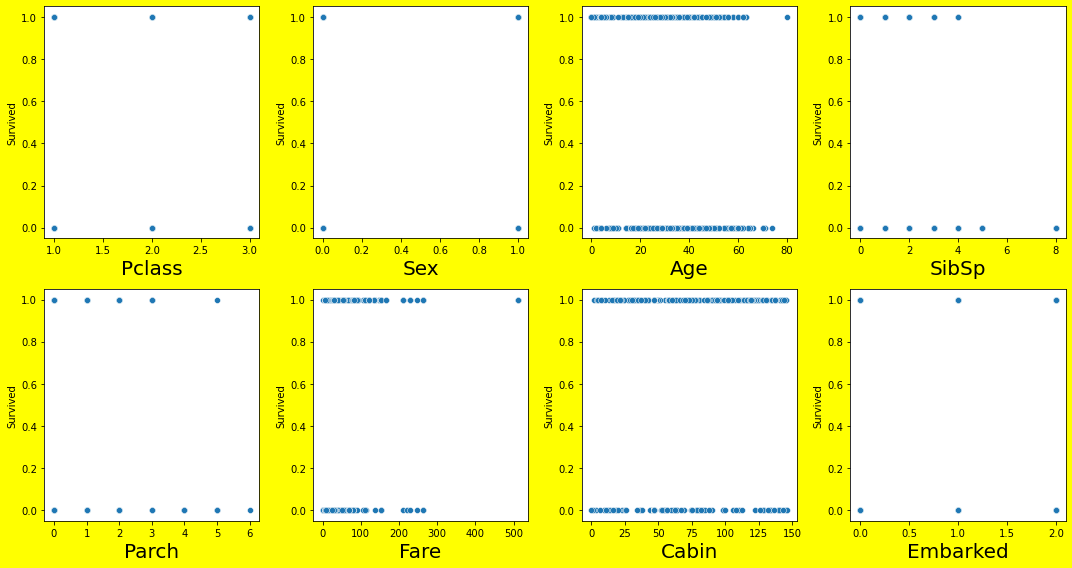

In [38]:
#Check for the relatinship between each features and Target
plt.figure(figsize=(15,8), facecolor='yellow')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in Features:#triggering your for loop
    if plotnumber<=8:#since there are 8 features
        ax = plt.subplot(2,4,plotnumber)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.scatterplot(x=Features[column],y=df['Survived'])#performing a relationship plot between features and label
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 8
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Scatter Plot
From the above scatter plot we can see a strong relationship between the below features and the Label(Survived)
- Age
- Fare
- Cabin

# Step 3.7 - Correlation Check;
 - Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [39]:
#checking for general correlation
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.067809,-0.035322,0.081629,0.257307,0.175690,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.335071,0.083081,0.018443,-0.549500,-0.248495,0.162098
Sex,-0.543351,0.131900,1.000000,0.082533,-0.114631,-0.245489,-0.182333,-0.102643,0.108262
Age,-0.067809,-0.335071,0.082533,1.000000,-0.232743,-0.176744,0.093856,0.057832,-0.022928
SibSp,-0.035322,0.083081,-0.114631,-0.232743,1.000000,0.414838,0.159651,-0.005539,0.068230
Parch,0.081629,0.018443,-0.245489,-0.176744,0.414838,1.000000,0.216225,0.022682,0.039798
Fare,0.257307,-0.549500,-0.182333,0.093856,0.159651,0.216225,1.000000,0.090516,-0.224719
Cabin,0.175690,-0.248495,-0.102643,0.057832,-0.005539,0.022682,0.090516,1.000000,0.023804
Embarked,-0.167675,0.162098,0.108262,-0.022928,0.068230,0.039798,-0.224719,0.023804,1.000000


In [40]:
#checking for correlation between each feature and Label
df.corr()['Survived'].sort_values()

Sex        -0.543351
Pclass     -0.338481
Embarked   -0.167675
Age        -0.067809
SibSp      -0.035322
Parch       0.081629
Cabin       0.175690
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

<AxesSubplot:>

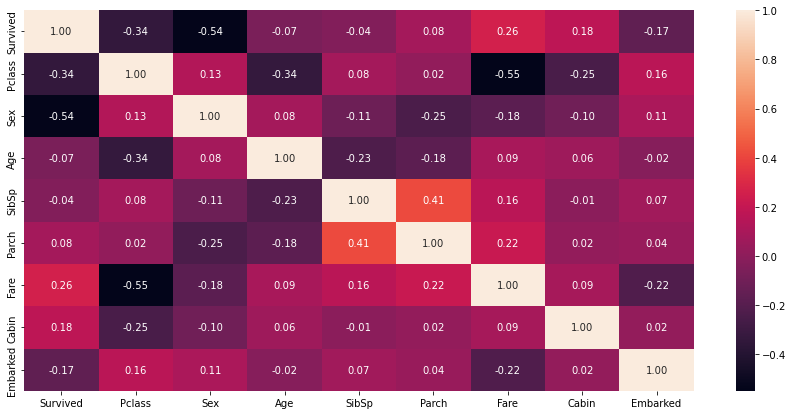

In [41]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

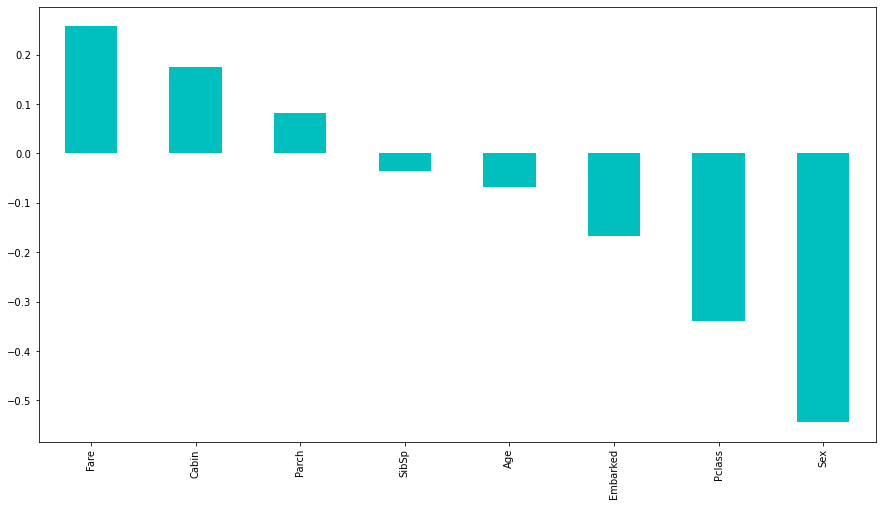

In [42]:
#Plotting a bar chart to visualize correlation through the stand-alone bars
plt.figure(figsize=(15,8))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar', color='c')
plt.show()

In [43]:
df.corr()['Survived'].sort_values()

Sex        -0.543351
Pclass     -0.338481
Embarked   -0.167675
Age        -0.067809
SibSp      -0.035322
Parch       0.081629
Cabin       0.175690
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

# Observations on Correlation
From the above correlation statistics;

Collinearity:
 - Sex has a negative correlation of 54% with the target column which can be considered as good bond
 - Pclass has a negative correlation of 33% with the target column which can be considered as farily good bond
 - Embarked has a negative correlation of 16% with the target column which can be considered as fair bond
 - Age has a negative correlation of 6.7% with the target column which can be considered as a weak bond
 - SibSp has a negative correlation of 3.5% with the target column which can be considered as a waek Bond!
 - Parch has a positive correlation of 8.1% with the target column which can be considered as a waek Bond!
 - Cabin has a positive correlation of 17% with the target column which can be considered as a Fair Bond!
 - Fare has a positive correlation of 25% with the target column which can be considered as a good Bond!

 
 - Feature with Maximum correlation = Sex
 - Feature with Minimum correlation = SibSp
 
Multicollinearity:
 - From the heatmap we can see that the pairs of features have some noticeable correllation between them 
     - SibSp and Parch 41%
But we will reconfrim during further steps by finding the Variance Inflation Factor(VIF)


NB: Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them!

# Step 3.8 - Outlier Check

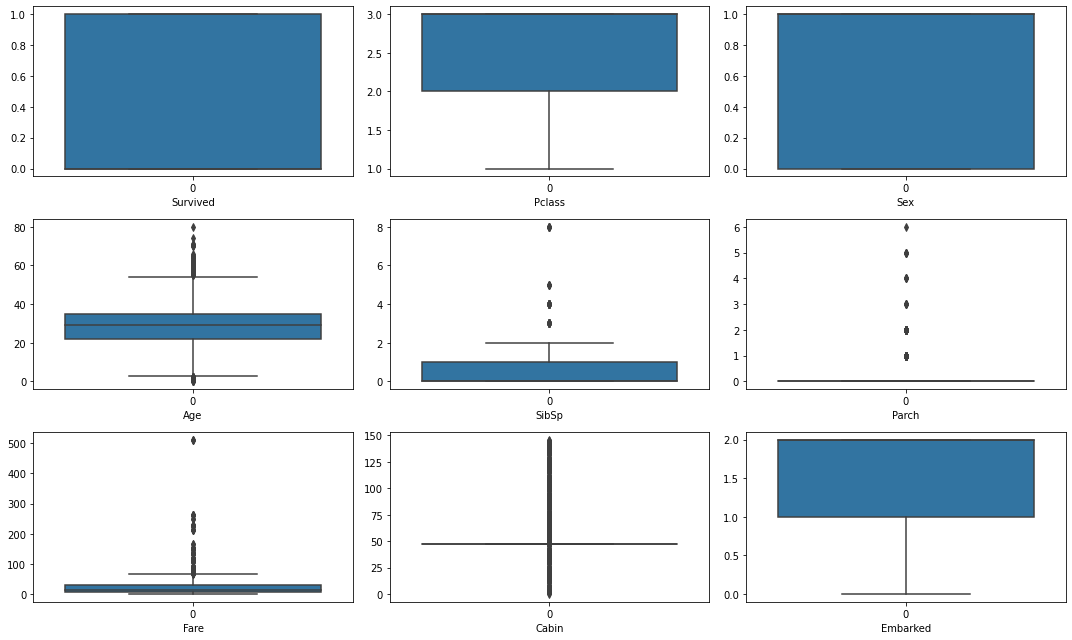

In [44]:
#Check for allien-datapoints in each features
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if graph<=9:#this was made 12 just to allow for 6 spaces
        plt.subplot(3,3,graph)#3,3 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df[column])#performing a box plot starting with fixed acidity
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form.

# Observations on Outlier Check
From the above visualization plot its evident that all the features posses outliers apart from Sex and Embarked, however this is subject to further analysis and reconfirmation using the zscore!

# Step 3.9 - Skewness Check

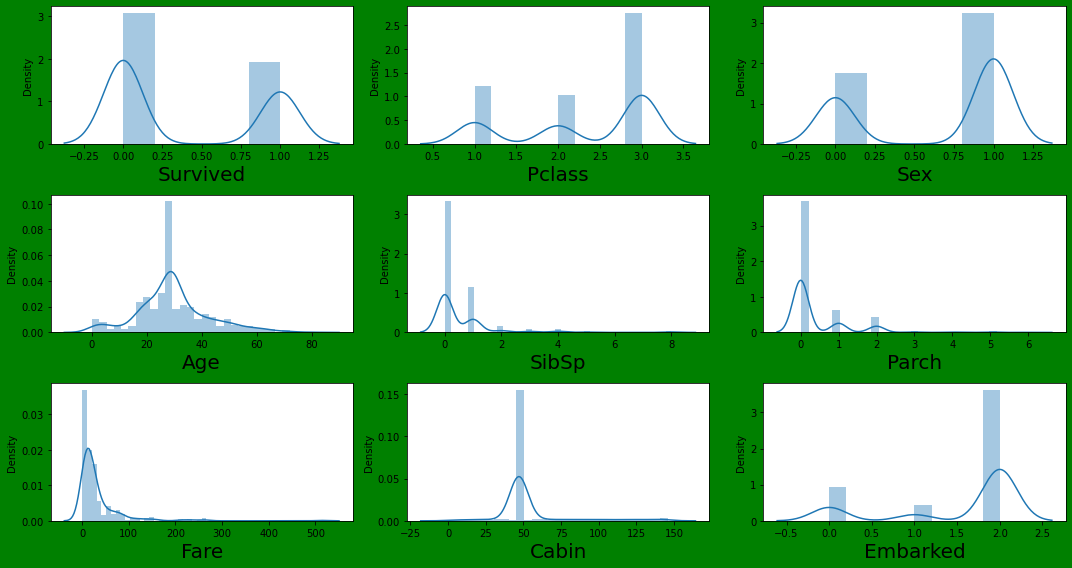

In [45]:
#Visualizing for skewness...
plt.figure(figsize=(15,8), facecolor='green')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=9:#since there are 6 features
        ax = plt.subplot(3,3,plotnumber)#3,3 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form. 

In [46]:
#Checking for skewness in each independent variable data which has been stored in the dataframe; 'features'
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.459563
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Cabin       2.268926
Embarked   -1.264823
dtype: float64

# Observations on Skewness Check: 
Lets assume Skewness threshold is taken as +/-0.65.Meaning any value outside +/-0.65 contains skewness. Hence majority of the Columns are having skewness:

 - SibSp:        3.6
 - Parch:        2.7
 - Fare:         4.8
 - Cabin:        2.3
 - Embarked:    -1.3

# Step 3.10  - Target Variable Check

0    549
1    342
Name: Survived, dtype: int64


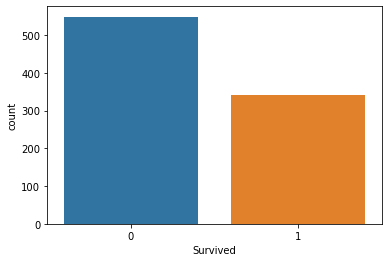

In [47]:
ax=sns.countplot(x='Survived',data=df)
print(df['Survived'].value_counts())

from the above graph the dependent variable has Two classes of with the majority being those that did not survive

# Step 4 - DATA PREPROCESSING

# Step 4.1 - Removal of Duplicates

In [48]:
#Recheking shape of original data
df.shape

(891, 9)

In [49]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(779, 9)

 - It appears there are 112(891-779) rows with the same data across each columns and has been removed since the rows has decreased from 891 to 779

# Step 4.2 - Rechecking the current Relationship btw Variables

In [50]:
#seperating the variables into X and Y variables
X=df.drop(columns=['Survived'])
Y=df['Survived']

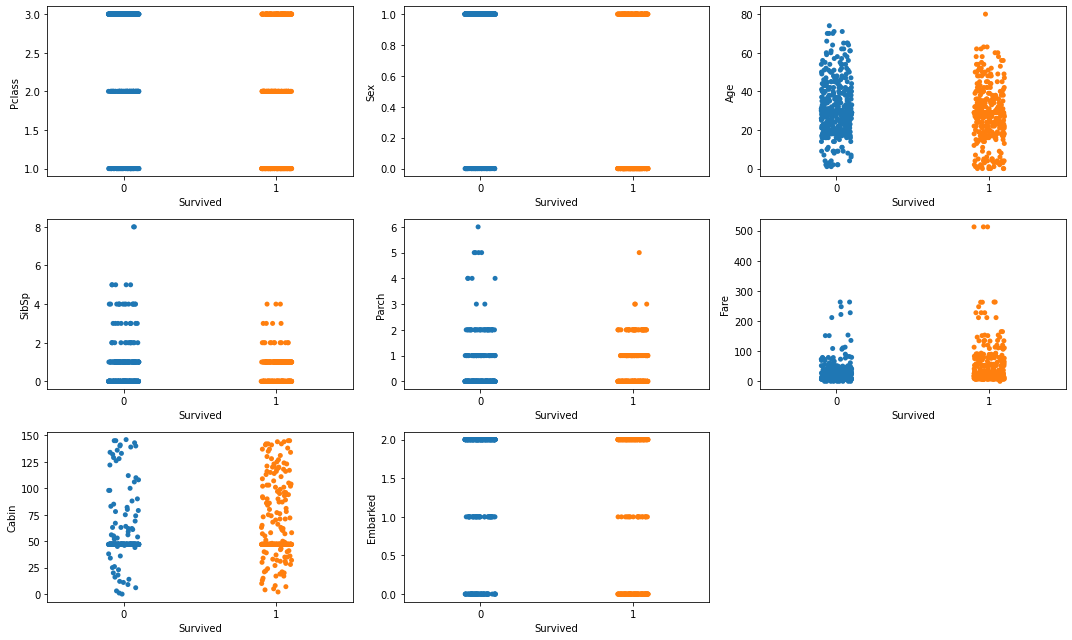

In [51]:
#Lets visualize our current data using a stripplot
plt.figure(figsize=(15,9))#dimension only
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’
for column in X:#triggering your for loop
    if plotnumber<=9:#since there are 9 features
        ax = plt.subplot(3,3,plotnumber)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.stripplot(Y,X[column])#performing a strip plot
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#

From the above strip plot, you can see a relationship between the target variable and Age,Cabin and Fare!

# Step 4.3 - Dropping of Features that strongly promotes multicollinearity(VIF)

<AxesSubplot:>

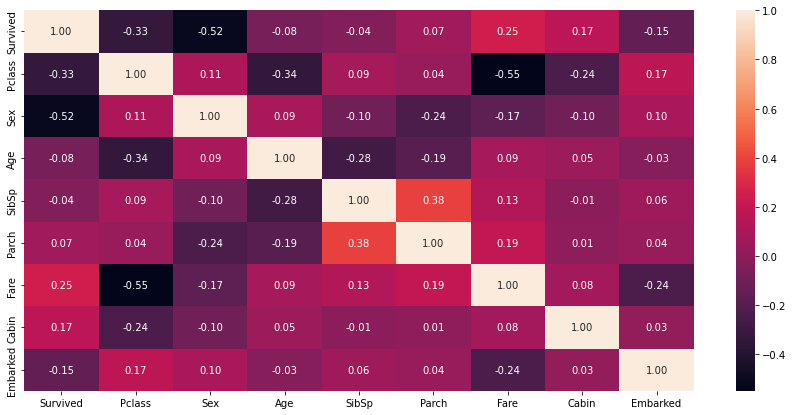

In [52]:
#Lets have a view of the heatmap again with particular focus on map-squares that are more brightened
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

From the heatmap we can see that the pairs of features have some noticeable correllation between them;
 - SibSP vs Parch has a correlation of 38%
 
However, lets reconfirm by calculating the Variance Inflation Factor(VIF)!

# Variance Inflation Factor(VIF)

To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [53]:
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[ 0.89023586,  0.7764539 , -0.56249442, ..., -0.52887697,
        -0.3046543 ,  0.58721394],
       [-1.44869748, -1.28790647,  0.59960245, ...,  0.69665031,
         1.05400438, -1.89887116],
       [ 0.89023586, -1.28790647, -0.2719702 , ..., -0.51595821,
        -0.3046543 ,  0.58721394],
       ...,
       [ 0.89023586, -1.28790647, -0.05407704, ..., -0.2188267 ,
        -0.3046543 ,  0.58721394],
       [-1.44869748,  0.7764539 , -0.2719702 , ..., -0.09346687,
         0.21483284, -1.89887116],
       [ 0.89023586,  0.7764539 ,  0.16381613, ..., -0.51930752,
        -0.3046543 , -0.65582861]])

In [54]:
#checking the shape
X_Scaled.shape

(779, 8)

Now we shall treat the above shape as an array of numbers(tuple) where 779 and 9 are the zeroth and first index respectively.

In [55]:
#initializing...creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [56]:
vif['vif']=[variance_inflation_factor(X_Scaled, i) for i in range(X_Scaled.shape[1])]#This is a list comprehension. in the for loop, the range(X_Scaled.shape[1]) which also means range(11) or (0,1,2,3,4,5,6,7,8,9,10), since X_Scaled.shape[1] means the first index in the X_Scaled.shape which is 11. Now all the columns in X_Scaled which is (0,1,2,3,4,5,6,7,8,9,10,) will now be compared with the entire X_Scaled one by one using the other part of the syntax which is variance_inflation_factor(X_Scaled, i). To shed more light, what happens here is that during th comparison using variance_inflation_factor(X_Scaled, i), the i is seen as a ‘Label’ while the X_Scaled is seen as a Feature. The output of this list comprehension is then stored in a column named 'vif' inside the empty ‘vif dataframe’ created above

In [57]:
vif['Features'] = X.columns#creating another column named 'Features' inside the empty vif Dataframe created earlier and populating it with a data called X.columns(i.e column names from the X DataFrame which was created by dropping the Label – ‘quality’ )
vif

,vif,Features
0,1.772690,Pclass
1,1.104107,Sex
2,1.247363,Age
3,1.260934,SibSp
4,1.277762,Parch
5,1.636183,Fare
6,1.077448,Cabin
7,1.087858,Embarked


From the above vif dataframe,we are setting a vif threshold of 5, meaning any feature with Variance Inflation Factor greater than 5 is assumed to have a multicollinearity problem. it is not standard. The dataset demands.

In lieu of the above assumption, NO MULTICOLLINEARITY EXIST!

# Step 4.4 - Removal of Outliers

This will be achieved using the zscore

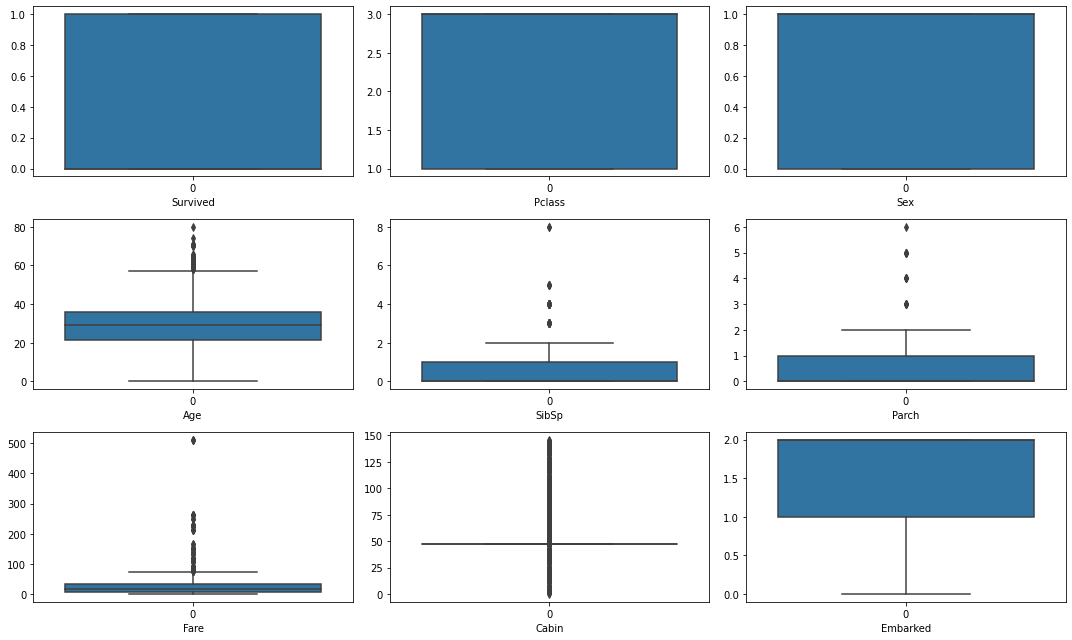

In [58]:
#Check again for allien-datapoints in each features
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if graph<=9:#this was made 12 just to allow for 6 spaces
        plt.subplot(3,3,graph)#3,3 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df[column])#performing a box plot starting with fixed acidity
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form.

In [59]:
#Get the absolute value of the zscore of the remaining dataset
np.abs(zscore(df))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.839402,0.890236,0.776454,0.562494,0.479502,0.499146,0.528877,0.304654,0.587214
1,1.191325,1.448697,1.287906,0.599602,0.479502,0.499146,0.696650,1.054004,1.898871
2,1.191325,0.890236,1.287906,0.271970,0.532780,0.499146,0.515958,0.304654,0.587214
3,1.191325,1.448697,1.287906,0.381709,0.479502,0.499146,0.348642,0.015030,0.587214
4,0.839402,0.890236,0.776454,0.381709,0.532780,0.499146,0.513566,0.304654,0.587214
...,...,...,...,...,...,...,...,...,...
885,0.839402,0.890236,1.287906,0.672234,0.532780,5.464576,0.110213,0.304654,0.655829
887,1.191325,1.448697,1.287906,0.780388,0.532780,0.499146,0.093467,0.983984,0.587214
888,0.839402,0.890236,1.287906,0.054077,0.479502,1.886343,0.218827,0.304654,0.587214
889,1.191325,1.448697,0.776454,0.271970,0.532780,0.499146,0.093467,0.214833,1.898871


In [60]:
#checking the data shape
z=np.abs(zscore(df))
z.shape

(779, 9)

Now we are setting threshold of outlier zscore>3, meaning any zscore above 3 is assumed to be an Outlier. Again, its not standard. The dataset demands.

In [61]:
#index number
np.where(z>3)

(array([ 10,  13,  16,  25,  27,  49,  58,  65,  67,  70,  74,  83,  84,
        111, 112, 120, 139, 150, 155, 158, 162, 170, 172, 173, 183, 192,
        218, 235, 242, 244, 245, 249, 260, 280, 290, 314, 315, 316, 319,
        330, 338, 345, 348, 353, 361, 396, 397, 397, 419, 433, 462, 470,
        483, 484, 499, 500, 506, 522, 543, 548, 560, 566, 584, 596, 597,
        601, 604, 607, 615, 616, 630, 631, 639, 645, 648, 649, 652, 679,
        680, 682, 685, 693, 711, 715, 725, 734, 745, 746, 753, 774],
       dtype=int64),
 array([7, 5, 4, 5, 6, 4, 4, 7, 4, 4, 7, 5, 6, 6, 4, 7, 7, 4, 4, 5, 4, 4,
        4, 7, 7, 7, 4, 7, 6, 4, 7, 4, 4, 6, 6, 7, 7, 6, 7, 5, 7, 6, 6, 4,
        7, 5, 5, 6, 7, 4, 7, 6, 4, 4, 6, 7, 5, 7, 5, 7, 3, 5, 7, 5, 6, 4,
        4, 6, 7, 6, 7, 6, 7, 6, 5, 6, 6, 7, 5, 7, 6, 4, 7, 4, 4, 7, 4, 3,
        5, 5], dtype=int64))

In [62]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df[(z<3).all(axis=1)]
print("Old DataFrame",df.shape)#Data still with outliers
print("New DataFrame",df_new.shape)#Data without outliers
print("total_dropped_rows",df.shape[0]-df_new.shape[0])#Take note of this arithmetic in df.shape

Old DataFrame (779, 9)
New DataFrame (690, 9)
total_dropped_rows 89


A Total of 89 outliers have been removed! Lets move on!

In [63]:
#Checking the new dataframe with non-outliers
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22,1,0,7.2500,47,2
1,1,1,0,38,1,0,71.2833,81,0
2,1,3,0,26,0,0,7.9250,47,2
3,1,1,0,35,1,0,53.1000,55,2
4,0,3,1,35,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...
883,0,2,1,28,0,0,10.5000,47,2
887,1,1,0,19,0,0,30.0000,30,2
888,0,3,0,29,1,2,23.4500,47,2
889,1,1,1,26,0,0,30.0000,60,0


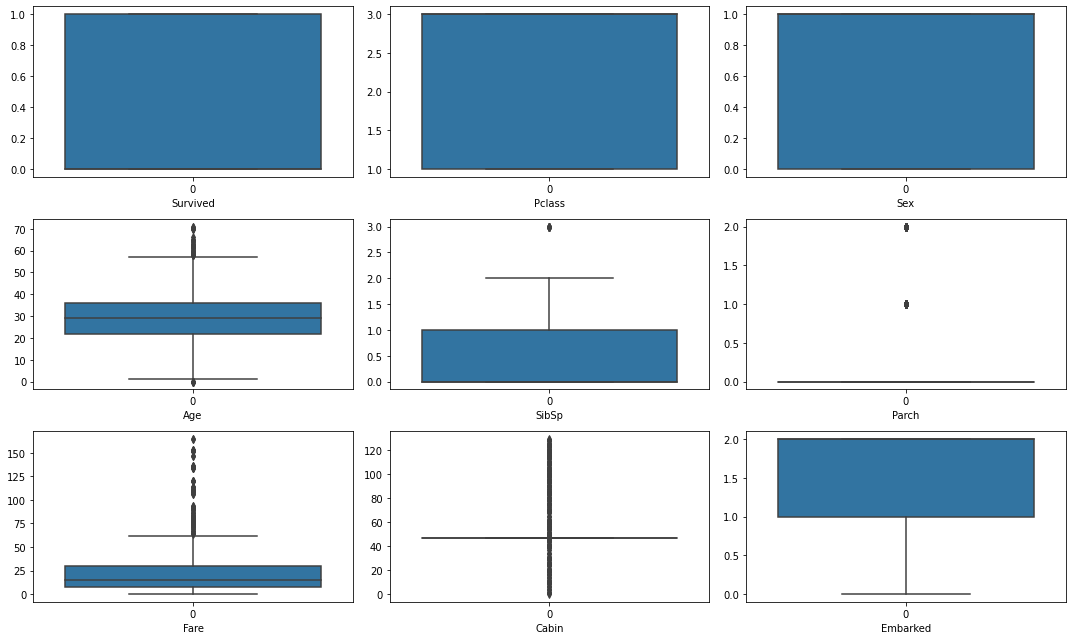

In [64]:
#reChecking for allien-datapoints in each features data which are now stored in df_new
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if graph<=9:#this was made 12 just to allow for 6 spaces
        plt.subplot(3,3,graph)#3,3 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df_new[column])#performing a box plot starting with 
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form.

From the above we can see that the real outliers have been removed across the features!

# Step 4.5 - Transforming Data to Remove Skewness using Power transformation

In [65]:
#rechecking for skewness...
df_new.skew()

Survived    0.360067
Pclass     -0.492622
Sex        -0.587233
Age         0.462962
SibSp       1.859179
Parch       2.016432
Fare        2.162747
Cabin       1.949249
Embarked   -1.219908
dtype: float64

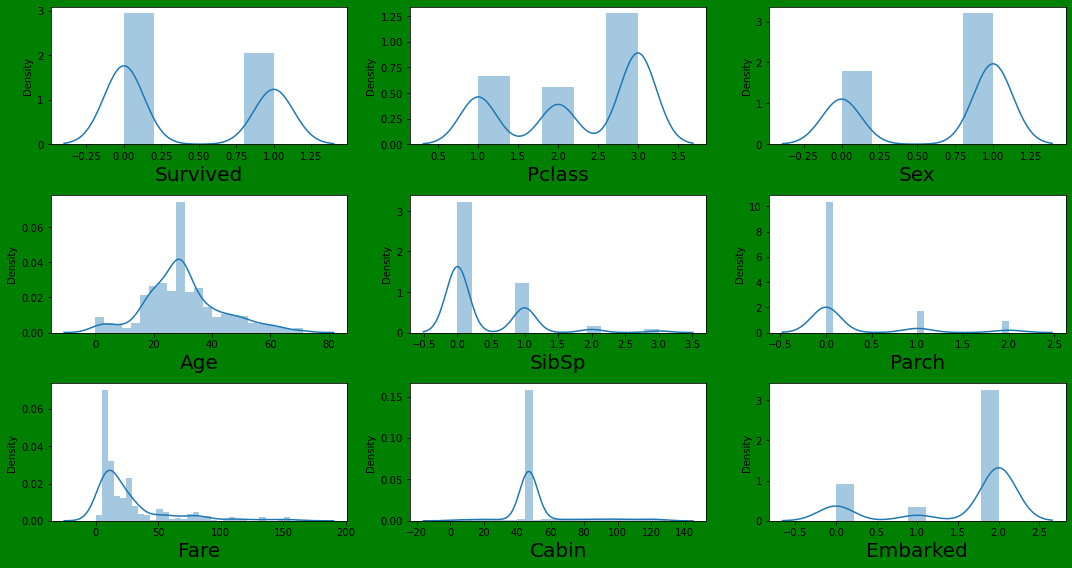

In [66]:
#Visualizing for the current skewness before Power Transformation
plt.figure(figsize=(15,8), facecolor='green')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=9:#since there are 6 features
        ax = plt.subplot(3,3,plotnumber)#2,5 means arrange the graphs in 2-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns starting with volatile acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form. 

Before we apply Power Transformation lets remove all non-zero values from Age, Fare

In [67]:
df_new['Age']=df_new['Age'].replace(0,df_new['Age'].mean())
df_new['Fare']=df_new['Fare'].replace(0,df_new['Fare'].mean())

In [68]:
#Instantiating PowerTransformer,using 'yeo-johnson',into object 'scaler'
scaler = PowerTransformer(method ='yeo-johnson')#intstantiating using the yeo-johnson
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [69]:
df_new.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [71]:
#extracting the columns that are skewed
data=['SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked']

In [72]:
#Now removing skewness by Power Transformation and updating dataset(df_new) with result
df_new[data] = scaler.fit_transform(df_new[data].values)

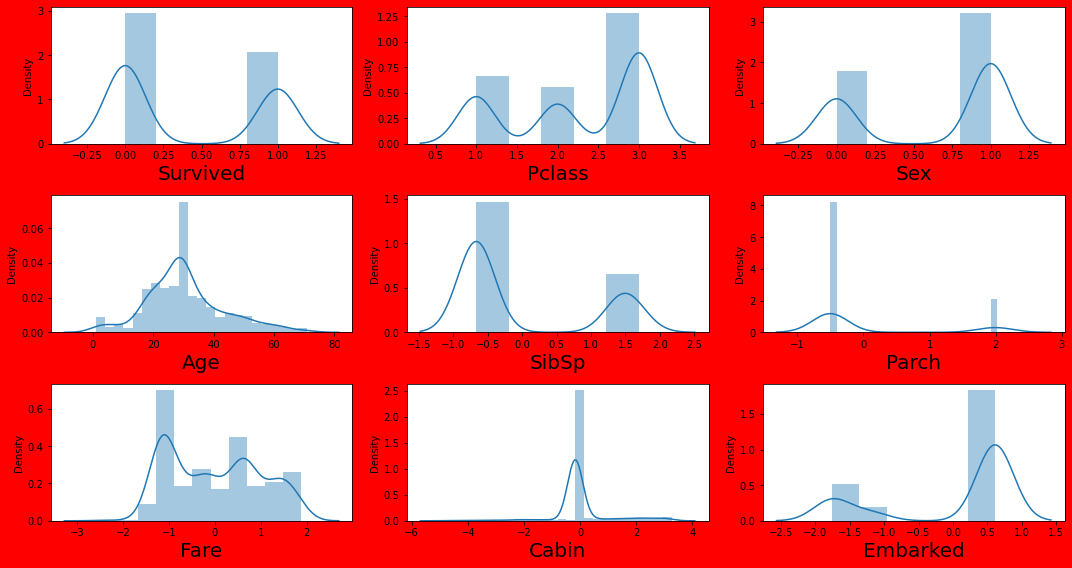

In [73]:
#Visualizing for the current skewness(if any) after Power Transformation
plt.figure(figsize=(15,8), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=9:#since there are 6 features
        ax = plt.subplot(3,3,plotnumber)#3,3 means arrange the graphs in 2-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns starting with volatile acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form. 

From the above we can see that skewness has been removed!

# Step 4.6 - Seperating the datasets into X and Y variables

In [74]:
#seperation
X=df_new.drop(columns=['Survived'])
Y=df_new['Survived']

# Transforming data into standard normal distribution

In [75]:
#transforming dataset into a standard normal distribution
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[ 0.89056242,  0.74905672, -0.66441956, ..., -1.2539146 ,
        -0.17394514,  0.61327468],
       [-1.47285323, -1.33501238,  0.58315801, ...,  1.44319837,
         1.47104261, -1.7555629 ],
       [ 0.89056242, -1.33501238, -0.35252517, ..., -1.09155866,
        -0.17394514,  0.61327468],
       ...,
       [ 0.89056242, -1.33501238, -0.11860438, ...,  0.47974971,
        -0.17394514,  0.61327468],
       [-1.47285323,  0.74905672, -0.35252517, ...,  0.74125227,
         0.50985204, -1.7555629 ],
       [ 0.89056242,  0.74905672,  0.11531642, ..., -1.13179424,
        -0.17394514, -1.19232351]])

What standard scaler does is to bring mean to zero and standard deviation to 1

In [76]:
#reconfirming that mean is 0
X_Scaled.mean()

-3.572021905315721e-17

In [77]:
#reconfirming that standard deviation is 1
X_Scaled.std()

1.0

# Step 4.7 - Imbalancing of Target Variable

0    406
1    284
Name: Survived, dtype: int64


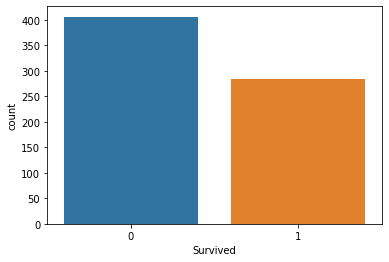

In [78]:
#Lets visualize data distribution amongst the new Binary classes
ax=sns.countplot(x='Survived',data=df_new)
print(df_new['Survived'].value_counts())

From the above graph we can see:

- the dependent variable has two classes of quality with the majority being Class 0(SURVIVED) and minority Class 1(NON-SURVIVORS)
- there is a clear case of imbalanced data and this will be resolved during futher preprocessing using sampling techniques

# Step 5 - MODEL BUILDING

# Step 5.1 - Logistic Regression

# Best Random State and Balancing Target Data(Oversampling)

In [105]:
#Using LogisticRegression to get the best Random state and apply SMOTE Oversampling technique
lr=LogisticRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    lr.fit(x_train_ns,y_train_ns)
    pred_train=lr.predict(x_train_ns)
    pred_test=lr.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 326, 1: 226})
The number of classes before fitCounter({0: 326, 1: 277})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  80.4 and 76.3 respectively
The number of classes before fitCounter({0: 328, 1: 224})
The number of classes before fitCounter({0: 328, 1: 278})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  72.5 and 78.9 respectively
The number of classes before fitCounter({0: 327, 1: 225})
The number of classes before fitCounter({0: 327, 1: 277})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  80.4 and 76.3 respectively
The number of classes before fitCounter({0: 323, 1: 229})
The number of classes before fitCounter({0: 323, 1: 274})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  81.2 and 75.9 respectively
The number of classes before fitCounter({0: 333, 1: 219})
The number of classes before fitCounter({0: 333, 1: 283})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 86.2% at random state 197

We have found best_random state value as 197. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [79]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=197,test_size=0.20)

In [80]:
x_train.shape

(552, 8)

In [81]:
x_test.shape

(138, 8)

In [82]:
y_train.shape

(552,)

In [83]:
y_test.shape

(138,)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [84]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 324, 1: 228})
The number of classes after fitCounter({0: 324, 1: 275})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 228 to 275.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [85]:
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train_ns)
Test_Accuracy_lr= (accuracy_score(y_test,pred_test))
Train_Accuracy_lr= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  86.23
Confusion Matrix  [[69 13]
 [ 6 50]]
Classification Report                precision    recall  f1-score   support

           0       0.92      0.84      0.88        82
           1       0.79      0.89      0.84        56

    accuracy                           0.86       138
   macro avg       0.86      0.87      0.86       138
weighted avg       0.87      0.86      0.86       138



LogisticRegression is producing good accuracy 86%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [86]:
#Validation accuracy
vac=cross_val_score(lr,X,Y,cv=5)
CV_Score_lr=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_lr)

[0.76086957 0.79710145 0.72463768 0.76086957 0.8115942 ]
Cross Validation Score is  0.7710144927536232


# Difference between Accuracy Score and Cross Validation Score

In [87]:
Test_Accuracy_lr

0.8623188405797102

In [88]:
CV_Score_lr

0.7710144927536232

In [89]:
lr_Acc_vs_CV_Score=np.abs(Test_Accuracy_lr-CV_Score_lr)
print("Difference between Accuracy and Cross Validation Score = ",lr_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.09130434782608698


From the above you can see that difference between Accuracy and Cross Validation score is neglible(0.091) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see the Accuracy of other Models!

# Step 5.2 - KNN Classifier

# Best Random State and Balancing Target Data(Oversampling)

In [90]:
#Using KNN Classifier to get the best Random state and apply SMOTE Oversampling technique
knn=KNeighborsClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    knn.fit(x_train_ns,y_train_ns)
    pred_train=knn.predict(x_train_ns)
    pred_test=knn.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 326, 1: 226})
The number of classes before fitCounter({0: 326, 1: 277})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  78.3 and 82.8 respectively
The number of classes before fitCounter({0: 328, 1: 224})
The number of classes before fitCounter({0: 328, 1: 278})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  71.7 and 84.3 respectively
The number of classes before fitCounter({0: 327, 1: 225})
The number of classes before fitCounter({0: 327, 1: 277})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  76.8 and 82.8 respectively
The number of classes before fitCounter({0: 323, 1: 229})
The number of classes before fitCounter({0: 323, 1: 274})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  77.5 and 82.9 respectively
The number of classes before fitCounter({0: 333, 1: 219})
The number of classes before fitCounter({0: 333, 1: 283})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 83.3% at random state 39

ThWe have found best_random state value as 39. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [91]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=39,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [92]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 325, 1: 227})
The number of classes after fitCounter({0: 325, 1: 276})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 227 to 276.

So we can now go ahead to train our model using the upgraded training data!

 # Training Model and Metrics Measurement

In [93]:
knn=KNeighborsClassifier()
knn.fit(x_train_ns,y_train_ns)
pred_test=knn.predict(x_test)
pred_train=knn.predict(x_train_ns)
Test_Accuracy_knn= (accuracy_score(y_test,pred_test))
Train_Accuracy_knn= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  84.06
Confusion Matrix  [[73  8]
 [14 43]]
Classification Report                precision    recall  f1-score   support

           0       0.84      0.90      0.87        81
           1       0.84      0.75      0.80        57

    accuracy                           0.84       138
   macro avg       0.84      0.83      0.83       138
weighted avg       0.84      0.84      0.84       138



KNeighbors is producing good accuracy 84%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [94]:
#Validation accuracy
vac=cross_val_score(knn,X,Y,cv=5)
CV_Score_knn=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_knn)

[0.66666667 0.69565217 0.65942029 0.65217391 0.73913043]
Cross Validation Score is  0.6826086956521739


# Difference between Accuracy Score and Cross Validation Score

In [95]:
Test_Accuracy_knn

0.8405797101449275

In [96]:
CV_Score_knn

0.6826086956521739

In [97]:
knn_Acc_vs_CV_Score=np.abs(Test_Accuracy_knn-CV_Score_knn)
print("Difference between Accuracy and Cross Validation Score = ",knn_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.15797101449275364


From the above you can see that difference between Accuracy and Cross Validation score is neglible(0.158) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see the Accuracy of other Models!

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points. 

In [120]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 323, 1: 229})
The number of classes after fitCounter({0: 323, 1: 274})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 229 to 274.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [121]:
dt=DecisionTreeClassifier()
dt.fit(x_train_ns,y_train_ns)
pred_test=dt.predict(x_test)
pred_train=dt.predict(x_train_ns)
Test_Accuracy_dt= (accuracy_score(y_test,pred_test))
Train_Accuracy_dt= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  76.81
Confusion Matrix  [[62 21]
 [11 44]]
Classification Report                precision    recall  f1-score   support

           0       0.85      0.75      0.79        83
           1       0.68      0.80      0.73        55

    accuracy                           0.77       138
   macro avg       0.76      0.77      0.76       138
weighted avg       0.78      0.77      0.77       138



Decision Tree Model is producing good accuracy - 77%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [122]:
#Validation accuracy
vac=cross_val_score(dt,X,Y,cv=5)
CV_Score_dt=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_dt)

[0.68115942 0.68115942 0.76086957 0.71014493 0.74637681]
Cross Validation Score is  0.7159420289855072


# Difference between Accuracy Score and Cross Validation Score

In [123]:
Test_Accuracy_dt

0.7681159420289855

In [124]:
CV_Score_dt

0.7159420289855072

In [125]:
dt_Acc_vs_CV_Score=np.abs(Test_Accuracy_dt-CV_Score_dt)
print("Difference between Accuracy and Cross Validation Score = ",dt_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.05217391304347829


From the above you can see that difference between Accuracy and Cross Validation score is low(0.052) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets try ensembling Techniques!

# Step 5.3 - RandomForest Classifier

# Best Random State and Balancing Data(Oversampling)

In [126]:
#Using RandomForest Classifier to get the best Random state and apply SMOTE Oversampling technique
rf=RandomForestClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    rf.fit(x_train_ns,y_train_ns)
    pred_train=rf.predict(x_train_ns)
    pred_test=rf.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 326, 1: 226})
The number of classes before fitCounter({0: 326, 1: 277})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  79.0 and 98.8 respectively
The number of classes before fitCounter({0: 328, 1: 224})
The number of classes before fitCounter({0: 328, 1: 278})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  75.4 and 98.3 respectively
The number of classes before fitCounter({0: 327, 1: 225})
The number of classes before fitCounter({0: 327, 1: 277})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  79.7 and 98.2 respectively
The number of classes before fitCounter({0: 323, 1: 229})
The number of classes before fitCounter({0: 323, 1: 274})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  77.5 and 98.3 respectively
The number of classes before fitCounter({0: 333, 1: 219})
The number of classes before fitCounter({0: 333, 1: 283})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 84.8% at random state 68

We have found best_random state value as 68. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [127]:
#using the random state of 81
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=68,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [128]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 314, 1: 238})
The number of classes after fitCounter({0: 314, 1: 266})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 238 to 266.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [129]:
rf=RandomForestClassifier()
rf.fit(x_train_ns,y_train_ns)
pred_test=rf.predict(x_test)
pred_train=rf.predict(x_train_ns)
Test_Accuracy_rf= (accuracy_score(y_test,pred_test))
Train_Accuracy_rf= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  84.06
Confusion Matrix  [[78 14]
 [ 8 38]]
Classification Report                precision    recall  f1-score   support

           0       0.91      0.85      0.88        92
           1       0.73      0.83      0.78        46

    accuracy                           0.84       138
   macro avg       0.82      0.84      0.83       138
weighted avg       0.85      0.84      0.84       138



RandomForest Classifier is producing good accuracy = 84%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [130]:
#Validation accuracy
vac=cross_val_score(rf,X,Y,cv=5)
CV_Score_rf=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_rf)

[0.69565217 0.77536232 0.79710145 0.76086957 0.78985507]
Cross Validation Score is  0.763768115942029


# Difference between Accuracy Score and Cross Validation Score

In [131]:
Test_Accuracy_rf

0.8405797101449275

In [132]:
CV_Score_rf

0.763768115942029

In [133]:
rf_Acc_vs_CV_Score=np.abs(Test_Accuracy_rf-CV_Score_rf)
print("Difference between Accuracy and Cross Validation Score = ",rf_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.07681159420289851


From the above you can see that difference between Accuracy and Cross Validation score is very low(0.077) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets build further ensemble Models!

# Step 5.4 - AdaBoost Classifier

# Best Random State and Balancing Data(Oversampling)

In [134]:
#Using AdaBoost Classifier to get the best Random state and apply SMOTE Oversampling technique
ada=AdaBoostClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    ada.fit(x_train_ns,y_train_ns)
    pred_train=ada.predict(x_train_ns)
    pred_test=ada.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 326, 1: 226})
The number of classes before fitCounter({0: 326, 1: 277})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  81.2 and 80.4 respectively
The number of classes before fitCounter({0: 328, 1: 224})
The number of classes before fitCounter({0: 328, 1: 278})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  71.0 and 81.4 respectively
The number of classes before fitCounter({0: 327, 1: 225})
The number of classes before fitCounter({0: 327, 1: 277})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  81.9 and 81.0 respectively
The number of classes before fitCounter({0: 323, 1: 229})
The number of classes before fitCounter({0: 323, 1: 274})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  76.8 and 81.2 respectively
The number of classes before fitCounter({0: 333, 1: 219})
The number of classes before fitCounter({0: 333, 1: 283})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 84.1% at random state 88

We have found best_random state value as 88. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [135]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=88,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [136]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 324, 1: 228})
The number of classes after fitCounter({0: 324, 1: 275})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 228 to 275

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [137]:
ada=AdaBoostClassifier()
ada.fit(x_train_ns,y_train_ns)
pred_test=ada.predict(x_test)
pred_train=ada.predict(x_train_ns)
Test_Accuracy_ada= (accuracy_score(y_test,pred_test))
Train_Accuracy_ada= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  82.61
Confusion Matrix  [[70 12]
 [12 44]]
Classification Report                precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.79      0.79      0.79        56

    accuracy                           0.83       138
   macro avg       0.82      0.82      0.82       138
weighted avg       0.83      0.83      0.83       138



AdaBoostClassifier is producing good accuracy = 83%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [138]:
#Validation accuracy
vac=cross_val_score(ada,X,Y,cv=5)
CV_Score_ada=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ada)

[0.7173913  0.78985507 0.75362319 0.76086957 0.81884058]
Cross Validation Score is  0.7681159420289856


# Difference between Accuracy Score and Cross Validation Score

In [139]:
Test_Accuracy_ada

0.8260869565217391

In [140]:
CV_Score_ada

0.7681159420289856

In [141]:
ada_Acc_vs_CV_Score=np.abs(Test_Accuracy_ada-CV_Score_ada)
print("Difference between Accuracy and Cross Validation Score = ",ada_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.05797101449275355


From the above you can see that difference between Accuracy and Cross Validation score is negligible(0.058) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets build further Models!

# Step 5.5 - GradientBoosting Classifier

# Best Random State and Balancing Data(Oversampling)

In [142]:
#Using GradientBoosting Classifier to get the best Random state and apply SMOTE Oversampling technique
gb=GradientBoostingClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    gb.fit(x_train_ns,y_train_ns)
    pred_train=gb.predict(x_train_ns)
    pred_test=gb.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 326, 1: 226})
The number of classes before fitCounter({0: 326, 1: 277})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  81.2 and 87.9 respectively
The number of classes before fitCounter({0: 328, 1: 224})
The number of classes before fitCounter({0: 328, 1: 278})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  72.5 and 89.9 respectively
The number of classes before fitCounter({0: 327, 1: 225})
The number of classes before fitCounter({0: 327, 1: 277})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  80.4 and 91.1 respectively
The number of classes before fitCounter({0: 323, 1: 229})
The number of classes before fitCounter({0: 323, 1: 274})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  82.6 and 88.9 respectively
The number of classes before fitCounter({0: 333, 1: 219})
The number of classes before fitCounter({0: 333, 1: 283})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 87% at random state 139

We have found best_random state value as 139. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [143]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=139,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [144]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 324, 1: 228})
The number of classes after fitCounter({0: 324, 1: 275})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 228 to 275.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [145]:
gb=GradientBoostingClassifier()
gb.fit(x_train_ns,y_train_ns)
pred_test=gb.predict(x_test)
pred_train=gb.predict(x_train_ns)
Test_Accuracy_gb= (accuracy_score(y_test,pred_test))
Train_Accuracy_gb= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  86.96
Confusion Matrix  [[77  5]
 [13 43]]
Classification Report                precision    recall  f1-score   support

           0       0.86      0.94      0.90        82
           1       0.90      0.77      0.83        56

    accuracy                           0.87       138
   macro avg       0.88      0.85      0.86       138
weighted avg       0.87      0.87      0.87       138



GradientBoosting Classifier is producing good accuracy = 87%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [146]:
#Validation accuracy
vac=cross_val_score(gb,X,Y,cv=5)
CV_Score_gb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_gb)

[0.71014493 0.79710145 0.79710145 0.7826087  0.79710145]
Cross Validation Score is  0.7768115942028986


# Difference between Accuracy Score and Cross Validation Score

In [147]:
Test_Accuracy_gb

0.8695652173913043

In [148]:
CV_Score_gb

0.7768115942028986

In [149]:
gb_Acc_vs_CV_Score=np.abs(Test_Accuracy_gb-CV_Score_gb)
print("Difference between Accuracy and Cross Validation Score = ",gb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.09275362318840574


From the above you can see that difference between Accuracy and Cross Validation score is low(0.093) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see the Accuracy of other Models!

# Step 5.6 - XGBoost Classifier

# Best Random State and Balancing Data(Oversampling)

In [150]:
#Using XGBoost Classifier to get the best Random state and apply SMOTE Oversampling technique
xgb=XGBClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    xgb.fit(x_train_ns,y_train_ns)
    pred_train=xgb.predict(x_train_ns)
    pred_test=xgb.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 326, 1: 226})
The number of classes before fitCounter({0: 326, 1: 277})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  79.0 and 98.2 respectively
The number of classes before fitCounter({0: 328, 1: 224})
The number of classes before fitCounter({0: 328, 1: 278})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  75.4 and 98.0 respectively
The number of classes before fitCounter({0: 327, 1: 225})
The number of classes before fitCounter({0: 327, 1: 277})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  76.1 and 97.2 respectively
The number of classes before fitCounter({0: 323, 1: 229})
The number of classes before fitCounter({0: 323, 1: 274})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  79.7 and 97.8 respectively
The number of classes before fitCounter({0: 333, 1: 219})
The number of classes before fitCounter({0: 333, 1: 283})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 83.3% at random state 185

We have found best_random state value as 185. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [151]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=185,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [152]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 328, 1: 224})
The number of classes after fitCounter({0: 328, 1: 278})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 224 to 278.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [153]:
xgb=XGBClassifier()
xgb.fit(x_train_ns,y_train_ns)
pred_test=xgb.predict(x_test)
pred_train=xgb.predict(x_train_ns)
Test_Accuracy_xgb= (accuracy_score(y_test,pred_test))
Train_Accuracy_xgb= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  82.61
Confusion Matrix  [[70  8]
 [16 44]]
Classification Report                precision    recall  f1-score   support

           0       0.81      0.90      0.85        78
           1       0.85      0.73      0.79        60

    accuracy                           0.83       138
   macro avg       0.83      0.82      0.82       138
weighted avg       0.83      0.83      0.82       138



XGBoost Classifier is producing good accuracy = 83%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [154]:
#Validation accuracy
vac=cross_val_score(xgb,X,Y,cv=5)
CV_Score_xgb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_xgb)

[0.73188406 0.76811594 0.8115942  0.76086957 0.77536232]
Cross Validation Score is  0.7695652173913043


# Difference between Accuracy Score and Cross Validation Score

In [155]:
Test_Accuracy_xgb

0.8260869565217391

In [156]:
CV_Score_xgb

0.7695652173913043

In [157]:
xgb_Acc_vs_CV_Score=np.abs(Test_Accuracy_xgb-CV_Score_xgb)
print("Difference between Accuracy and Cross Validation Score = ",xgb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.05652173913043479


From the above you can see that difference between Accuracy and Cross Validation score is low(0.057) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see more Models!

# Step 5.7 - ExtraTrees Classifier

# Best Random State and Balancing Data(Oversampling)

In [158]:
#Using ExtraTrees Classifier to get the best Random state and apply SMOTE Oversampling technique
ex=ExtraTreesClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    ex.fit(x_train_ns,y_train_ns)
    pred_train=ex.predict(x_train_ns)
    pred_test=ex.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 326, 1: 226})
The number of classes before fitCounter({0: 326, 1: 277})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  73.9 and 98.8 respectively
The number of classes before fitCounter({0: 328, 1: 224})
The number of classes before fitCounter({0: 328, 1: 278})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  78.3 and 98.3 respectively
The number of classes before fitCounter({0: 327, 1: 225})
The number of classes before fitCounter({0: 327, 1: 277})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  76.8 and 98.2 respectively
The number of classes before fitCounter({0: 323, 1: 229})
The number of classes before fitCounter({0: 323, 1: 274})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  73.2 and 98.3 respectively
The number of classes before fitCounter({0: 333, 1: 219})
The number of classes before fitCounter({0: 333, 1: 283})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 84.1% at random state 68

We have found best_random state value as 68. We will now create our tain_test_splitusing this randome_state 

# Creating train_test_split....

In [159]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=68,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [160]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 314, 1: 238})
The number of classes after fitCounter({0: 314, 1: 266})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 238 to 266.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [161]:
ex=ExtraTreesClassifier()
ex.fit(x_train_ns,y_train_ns)
pred_test=ex.predict(x_test)
pred_train=ex.predict(x_train_ns)
Test_Accuracy_ex= (accuracy_score(y_test,pred_test))
Train_Accuracy_ex= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  84.78
Confusion Matrix  [[77 15]
 [ 6 40]]
Classification Report                precision    recall  f1-score   support

           0       0.93      0.84      0.88        92
           1       0.73      0.87      0.79        46

    accuracy                           0.85       138
   macro avg       0.83      0.85      0.84       138
weighted avg       0.86      0.85      0.85       138



ExtraTress Classifier is producing good accuracy = 85%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [162]:
#Validation of accuracy
vac=cross_val_score(ex,X,Y,cv=5)
CV_Score_ex=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ex)

[0.6884058  0.74637681 0.77536232 0.73188406 0.76086957]
Cross Validation Score is  0.7405797101449275


# Difference between Accuracy Score and Cross Validation Score

In [163]:
Test_Accuracy_ex

0.8478260869565217

In [164]:
CV_Score_ex

0.7405797101449275

In [165]:
ex_Acc_vs_CV_Score=np.abs(Test_Accuracy_ex-CV_Score_ex)
print("Difference between Accuracy and Cross Validation Score = ",ex_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.10724637681159421


From the above you can see that difference between Accuracy and Cross Validation score is low(0.107) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see more Models!

# Step 5.8 - Support Vector Classifier(SVC)

# Best Random State and Balancing Data(Oversampling)

In [166]:
#Using SVC to get the best Random state and apply SMOTE Oversampling technique
sv=SVC()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    sv.fit(x_train_ns,y_train_ns)
    pred_train=sv.predict(x_train_ns)
    pred_test=sv.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 326, 1: 226})
The number of classes before fitCounter({0: 326, 1: 277})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  80.4 and 82.1 respectively
The number of classes before fitCounter({0: 328, 1: 224})
The number of classes before fitCounter({0: 328, 1: 278})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  78.3 and 83.0 respectively
The number of classes before fitCounter({0: 327, 1: 225})
The number of classes before fitCounter({0: 327, 1: 277})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  79.7 and 82.3 respectively
The number of classes before fitCounter({0: 323, 1: 229})
The number of classes before fitCounter({0: 323, 1: 274})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  80.4 and 83.1 respectively
The number of classes before fitCounter({0: 333, 1: 219})
The number of classes before fitCounter({0: 333, 1: 283})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 86.2% at random state 130

We have found best_random state value as 130. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [178]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=130,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [171]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 326, 1: 226})
The number of classes after fitCounter({0: 326, 1: 277})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 226 to 277.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [179]:
sv=SVC()
sv.fit(x_train_ns,y_train_ns)
pred_test=sv.predict(x_test)
pred_train=sv.predict(x_train_ns)
Test_Accuracy_sv= (accuracy_score(y_test,pred_test))
Train_Accuracy_sv= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  85.51
Confusion Matrix  [[73  7]
 [13 45]]
Classification Report                precision    recall  f1-score   support

           0       0.85      0.91      0.88        80
           1       0.87      0.78      0.82        58

    accuracy                           0.86       138
   macro avg       0.86      0.84      0.85       138
weighted avg       0.86      0.86      0.85       138



Support Vector is producing good accuracy = 86%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [180]:
#Validation accuracy
vac=cross_val_score(sv,X,Y,cv=5)
CV_Score_sv=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_sv)

[0.63043478 0.62318841 0.65942029 0.63043478 0.65217391]
Cross Validation Score is  0.6391304347826088


# Difference between Accuracy Score and Cross Validation Score

In [181]:
Test_Accuracy_sv

0.855072463768116

In [182]:
CV_Score_sv

0.6391304347826088

In [183]:
sv_Acc_vs_CV_Score=np.abs(Test_Accuracy_sv-CV_Score_sv)
print("Difference between Accuracy and Cross Validation Score = ",sv_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.21594202898550718


From the above you can see that difference between Accuracy and Cross Validation score is low(0.216) meaning that our model is very good and not having any overfitting or underfitting problems!!

 Now that we have build 8 models in total lets compare each of them and find the best Model!

# Step 6 - COMPARING ALL MACHINE LEARNING MODELS

Lets create a dataframe that will juxtapose the metrics of all the models...

In [197]:
#Constructing a dataframe...
models = pd.DataFrame({'Model' : ['Logistic Regression','KNN Classifier', 'Random Forest Classifier','Ada Boosting Classifier','Gradient Boosting Classifier', 'XgBoost','Extra Trees Classifer','Support Vector Classifier'],'Accuracy_Score' : [Test_Accuracy_lr,Test_Accuracy_knn,Test_Accuracy_rf,Test_Accuracy_ada,Test_Accuracy_gb,Test_Accuracy_xgb,Test_Accuracy_ex,Test_Accuracy_sv],'Cross_Validation_Score':[CV_Score_lr,CV_Score_knn,CV_Score_rf,CV_Score_ada,CV_Score_gb,CV_Score_xgb,CV_Score_ex,CV_Score_sv],'Accuracy_VS_CVScore':[lr_Acc_vs_CV_Score,knn_Acc_vs_CV_Score,rf_Acc_vs_CV_Score,ada_Acc_vs_CV_Score,gb_Acc_vs_CV_Score,xgb_Acc_vs_CV_Score,ex_Acc_vs_CV_Score,sv_Acc_vs_CV_Score]})
models

,Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
0,Logistic Regression,0.862319,0.771014,0.091304
1,KNN Classifier,0.840580,0.682609,0.157971
2,Random Forest Classifier,0.840580,0.763768,0.076812
3,Ada Boosting Classifier,0.826087,0.768116,0.057971
4,Gradient Boosting Classifier,0.869565,0.776812,0.092754
5,XgBoost,0.826087,0.769565,0.056522
6,Extra Trees Classifer,0.847826,0.740580,0.107246
7,Support Vector Classifier,0.855072,0.639130,0.215942


In [198]:
#Converting Accuracy and Cross_Validation_Score into Percentage....
models["Accuracy_Score"] = (models["Accuracy_Score"] * 100).round(2)
models["Cross_Validation_Score"] = (models["Cross_Validation_Score"] * 100).round(2)
models.sort_values(by = 'Accuracy_Score', ascending = False)

,Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
4,Gradient Boosting Classifier,86.96,77.68,0.092754
0,Logistic Regression,86.23,77.10,0.091304
7,Support Vector Classifier,85.51,63.91,0.215942
6,Extra Trees Classifer,84.78,74.06,0.107246
1,KNN Classifier,84.06,68.26,0.157971
2,Random Forest Classifier,84.06,76.38,0.076812
3,Ada Boosting Classifier,82.61,76.81,0.057971
5,XgBoost,82.61,76.96,0.056522


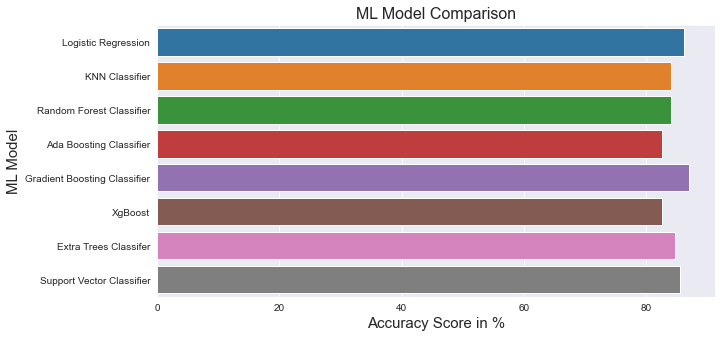

In [199]:
#Now focusing on the Accuracy Score....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_Score', y = 'Model', data = models)

plt.xlabel('Accuracy Score in %', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('ML Model Comparison', fontsize = 16)

plt.show()

Now from the above diagram it seems that GradientBoosting(86.97%) has the highest Accuracy, However, our aim is to find the BEST MODEL, so if we consider the difference Between Accuracy_Score and Cross_Validation_Score....

# Step 6.1 - Comparing Differences between Accuracy and Cross_Validation Scores...

Lets sort by the column; Accuracy_VS_CVScore to have a good view of the differential between Accuracy_Score and CVScore

In [200]:
#Sorting....
models.sort_values(by = 'Accuracy_VS_CVScore', ascending = True)

,Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
5,XgBoost,82.61,76.96,0.056522
3,Ada Boosting Classifier,82.61,76.81,0.057971
2,Random Forest Classifier,84.06,76.38,0.076812
0,Logistic Regression,86.23,77.10,0.091304
4,Gradient Boosting Classifier,86.96,77.68,0.092754
6,Extra Trees Classifer,84.78,74.06,0.107246
1,KNN Classifier,84.06,68.26,0.157971
7,Support Vector Classifier,85.51,63.91,0.215942


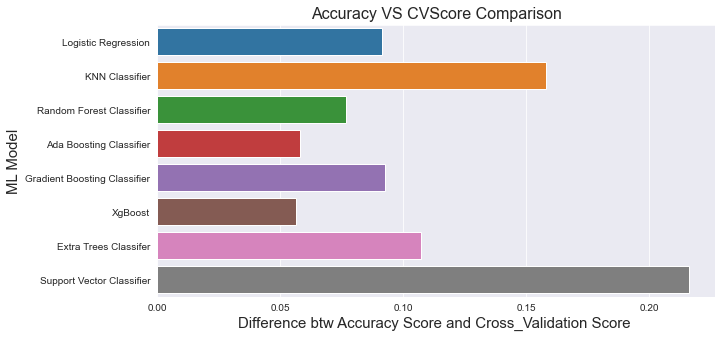

In [201]:
#Now focusing on the differnce btw Accuracy Score and Cross_Validation Scores
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_VS_CVScore', y = 'Model', data = models)

plt.xlabel('Difference btw Accuracy Score and Cross_Validation Score ', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('Accuracy VS CVScore Comparison', fontsize = 16)

plt.show()

From the above we can see the Model with least difference is XGBoost Classifier!

# Step 6.2 - Conclusion on Choice of Model

From the above we can see:
- The least difference is 0.056
- The Model with least difference is XGBoost Classifer!

# Hence Optimum Machine Model Chosen = XGBoost Classifer!

# Step 7 - HYPERPARAMETER TUNNING
 - Lets prepare list of parameters with options

In [202]:
xgb=XGBClassifier()

In [489]:
parameter_grid={'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.30,0.40],'max_depth':[50,100,150,200],'n_jobs':[1,2,3,4,5],'min_samples_split':range(2,8,2)}

In [490]:
#Gridsearch
gridsearch = GridSearchCV(xgb, parameter_grid, cv=5,scoring="accuracy")
gridsearch.fit(x_train_ns, y_train_ns);

[15:40:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:40:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:40:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not 

In [491]:
#Get best hyperparameters
gridsearch.best_params_

{'learning_rate': 0.3,
 'max_depth': 50,
 'min_samples_split': 2,
 'n_estimators': 47,
 'n_jobs': 1}

Now lets use the best parameters.....

In [492]:
#Instantiating using the best parameters...
xgb=XGBClassifier(learning_rate=0.3,max_depth=50,n_estimators=47,n_jobs=1)

In [493]:
#fitting the model...
xgb.fit(x_train_ns,y_train_ns)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=50, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=47, n_jobs=1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [496]:
pred_test=xgb.predict(x_test)

In [497]:
accuracy_score(y_test,pred_test)

0.8260869565217391

# Step 8 - ROC AUC PLOT

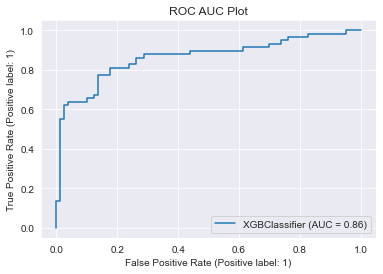

In [499]:
plot_roc_curve(xgb,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

From the above we can see:
- Final Accuracy is 83% and AUC Score is 86% 
- That the XGBoosting Classifier has an AUC close to 1(i.e 0.86)

HENCE WE CAN CONCLUDE OUR MODEL IS PRETTY GOOD!!

# Step 9 - MODEL SAVING

In [500]:
filename='Machine_Model_Project_Titanic'
pickle.dump(xgb,open(filename,'wb'))